In [12]:
import pandas as pd
url = 'https://www.fueleconomy.gov/feg/epadata/vehicles.csv' 

raw = pd.read_csv(url)#, dtype_backend='pyarrow', engine='pyarrow')

/var/folders/l4/jflj14k17pg47nd_5mz4rfx00000gn/T/ipykernel_20237/794973991.py:4: DtypeWarning: Columns (69,71,72,73,74,75,77,80) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(url)#, dtype_backend='pyarrow', engine='pyarrow')


In [14]:
cols = ['year', 'make', 'model', 'trany', 'drive', 'VClass', 'eng_dscr',
    'barrels08', 'city08', 'comb08', 'range', 'evMotor', 'cylinders', 'displ', 'fuelCost08', 
        'fuelType', 'highway08',  'trans_dscr','createdOn']

def to_tz(df_, time_col, tz_offset, tz_name):
    return (df_
            .groupby(tz_offset)
            [time_col]
            .transform(lambda s: pd.to_datetime(s)
                       .dt.tz_localize(s.name, ambiguous=True)
                       .dt.tz_convert(tz_name))
            )

autos = (raw.loc[:, cols]
         .assign(
            offset=(raw.createdOn.str.extract(r'\d\d:\d\d (?P<offset>[A-Z]{3}?)')
                .replace('EDT', 'EST5EDT')),
            str_date=(raw.createdOn.str.slice(4,19) + ' ' +
                raw.createdOn.str.slice(-4)),
            createdOn=lambda df_: to_tz(df_, 'str_date', 'offset', 'America/New_York')
         )
)
autos.dtypes

year                                     int64
make                                    object
model                                   object
trany                                   object
drive                                   object
VClass                                  object
eng_dscr                                object
barrels08                              float64
city08                                   int64
comb08                                   int64
range                                    int64
evMotor                                 object
cylinders                              float64
displ                                  float64
fuelCost08                               int64
fuelType                                object
highway08                                int64
trans_dscr                              object
createdOn     datetime64[ns, America/New_York]
offset                                  object
str_date                                object
dtype: object

In [15]:
autos[autos['cylinders'].isna()]

,year,make,model,trany,drive,VClass,eng_dscr,barrels08,city08,comb08,...,evMotor,cylinders,displ,fuelCost08,fuelType,highway08,trans_dscr,createdOn,offset,str_date
7138,2000,Nissan,Altra EV,NaN,NaN,Midsize Station Wagons,NaN,0.0960,81,85,...,62 KW AC Induction,NaN,NaN,900,Electricity,91,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
7139,2000,Toyota,RAV4 EV,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,NaN,0.1128,81,72,...,50 KW DC,NaN,NaN,1050,Electricity,64,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
8143,2001,Toyota,RAV4 EV,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,NaN,0.1128,81,72,...,50 KW DC,NaN,NaN,1050,Electricity,64,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
8144,2001,Ford,Th!nk,NaN,NaN,Two Seaters,NaN,0.1248,74,65,...,27 KW AC Induction,NaN,NaN,1150,Electricity,58,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
8146,2001,Ford,Explorer USPS Electric,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,NaN,0.2088,45,39,...,67 KW AC Induction,NaN,NaN,1950,Electricity,33,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44027,2026,Tesla,Cybertruck AWD,Automatic (A1),All-Wheel Drive,Standard Pickup Trucks 4WD,NaN,0.1032,85,79,...,223 and 226 kW ACPM 3-Phase,NaN,NaN,950,Electricity,72,NaN,2025-10-28 00:00:00-04:00,EST5EDT,Oct 28 00:00:00 2025
44029,2026,Tesla,Model Y Standard RWD (18in Wheels),Automatic (A1),Rear-Wheel Drive,Small Sport Utility Vehicle 2WD,NaN,0.0576,148,138,...,228 and 243 kW ACPM 3-Phase,NaN,NaN,550,Electricity,129,NaN,2025-10-28 00:00:00-04:00,EST5EDT,Oct 28 00:00:00 2025
44030,2026,Tesla,Model Y Standard RWD (19in Wheels),Automatic (A1),Rear-Wheel Drive,Small Sport Utility Vehicle 2WD,NaN,0.0624,142,131,...,228 and 243 kW ACPM 3-Phase,NaN,NaN,600,Electricity,120,NaN,2025-10-28 00:00:00-04:00,EST5EDT,Oct 28 00:00:00 2025
44031,2026,Toyota,bZ (energy capacity 191 Ah),Automatic (A1),Front-Wheel Drive,Small Sport Utility Vehicle 2WD,NaN,0.0624,143,131,...,167 kW AC Synchronous,NaN,NaN,550,Electricity,119,NaN,2025-10-28 00:00:00-04:00,EST5EDT,Oct 28 00:00:00 2025


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(transform_output = 'pandas')  # Just transform out pandas 

pipe = Pipeline([('impute', SimpleImputer(strategy = 'median'))])

pipe.fit_transform(autos[['cylinders']])

,cylinders
0,4.0
1,12.0
2,4.0
3,8.0
4,4.0
...,...
49575,4.0
49576,4.0
49577,4.0
49578,4.0


In [20]:
pipe.fit_transform(autos[['cylinders']]).isna().sum()

cylinders    0
dtype: int64

In [21]:
from sklearn.compose import ColumnTransformer

In [23]:
displ_imputer = SimpleImputer(strategy = 'median')
cylinder_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)

preprocessor = ColumnTransformer(
    transformers = [
        ('cyl_imputer' , cylinder_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ'])
    ],
    remainder = 'passthrough'

)

pipeline = Pipeline(steps = [('preprocessor', preprocessor)])
pipeline.fit_transform(autos)

,cyl_imputer__cylinders,displ_imputer__displ,remainder__year,remainder__make,remainder__model,remainder__trany,remainder__drive,remainder__VClass,remainder__eng_dscr,remainder__barrels08,...,remainder__comb08,remainder__range,remainder__evMotor,remainder__fuelCost08,remainder__fuelType,remainder__highway08,remainder__trans_dscr,remainder__createdOn,remainder__offset,remainder__str_date
0,4.0,2.0,1985,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(FFS),14.167143,...,21,0,NaN,2100,Regular,25,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
1,12.0,4.9,1985,Ferrari,Testarossa,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(GUZZLER),27.046364,...,11,0,NaN,4000,Regular,14,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
2,4.0,2.2,1985,Dodge,Charger,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,(FFS),11.018889,...,27,0,NaN,1650,Regular,33,SIL,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
3,8.0,5.2,1985,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Rear-Wheel Drive,Vans,NaN,27.046364,...,11,0,NaN,4000,Regular,12,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
4,4.0,2.2,1993,Subaru,Legacy AWD Turbo,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,"(FFS,TRBO)",15.658421,...,19,0,NaN,3050,Premium,23,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49575,4.0,2.2,1993,Subaru,Legacy,Automatic 4-spd,Front-Wheel Drive,Compact Cars,(FFS),13.523182,...,22,0,NaN,2000,Regular,26,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49576,4.0,2.2,1993,Subaru,Legacy,Manual 5-spd,Front-Wheel Drive,Compact Cars,(FFS),12.935217,...,23,0,NaN,1900,Regular,28,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49577,4.0,2.2,1993,Subaru,Legacy AWD,Automatic 4-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,...,21,0,NaN,2100,Regular,24,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49578,4.0,2.2,1993,Subaru,Legacy AWD,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,...,21,0,NaN,2100,Regular,24,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013


## Binning

Matplotlib is building the font cache; this may take a moment.


<Axes: >

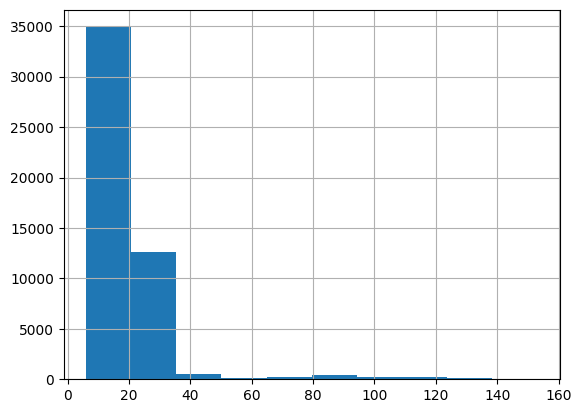

In [24]:
autos.city08.hist()

Binnig is sort of categorizing values into buckets - 

((array([-4.18947091, -3.98363317, -3.87140876, ...,  3.87140876,
          3.98363317,  4.18947091], shape=(49580,)),
  array([  6,   6,   6, ..., 151, 153, 153], shape=(49580,))),
 (np.float64(9.663796025602968),
  np.float64(20.593565954013712),
  np.float64(0.6709985017581467)))

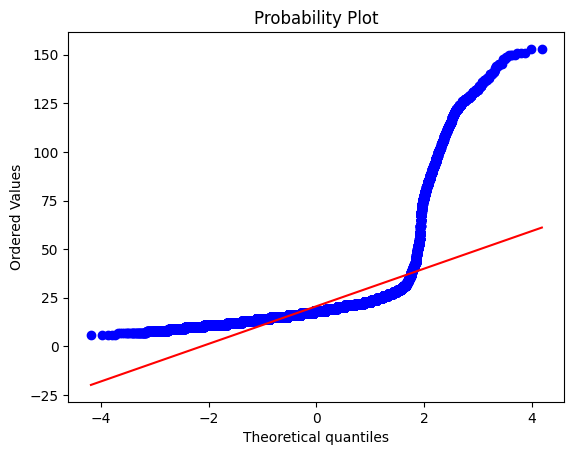

In [25]:
from scipy import stats
from matplotlib import pyplot as plt 

stats.probplot(autos.city08, plot = plt)

In [26]:
autos['city08']

0        19
1         9
2        23
3        10
4        17
         ..
49575    19
49576    20
49577    18
49578    18
49579    16
Name: city08, Length: 49580, dtype: int64

In [28]:
binpd = pd.cut(autos.city08, bins = 10)

In [29]:
binpd.value_counts()

city08
(5.853, 20.7]     34894
(20.7, 35.4]      12656
(35.4, 50.1]        553
(79.5, 94.2]        397
(94.2, 108.9]       256
(64.8, 79.5]        243
(108.9, 123.6]      218
(50.1, 64.8]        167
(123.6, 138.3]      164
(138.3, 153.0]       32
Name: count, dtype: int64

In [32]:
binpd.value_counts().sort_values(ascending = False)

city08
(5.853, 20.7]     34894
(20.7, 35.4]      12656
(35.4, 50.1]        553
(79.5, 94.2]        397
(94.2, 108.9]       256
(64.8, 79.5]        243
(108.9, 123.6]      218
(50.1, 64.8]        167
(123.6, 138.3]      164
(138.3, 153.0]       32
Name: count, dtype: int64

In [34]:
binpd.value_counts().sort_index()

city08
(5.853, 20.7]     34894
(20.7, 35.4]      12656
(35.4, 50.1]        553
(50.1, 64.8]        167
(64.8, 79.5]        243
(79.5, 94.2]        397
(94.2, 108.9]       256
(108.9, 123.6]      218
(123.6, 138.3]      164
(138.3, 153.0]       32
Name: count, dtype: int64

<Axes: xlabel='city08'>

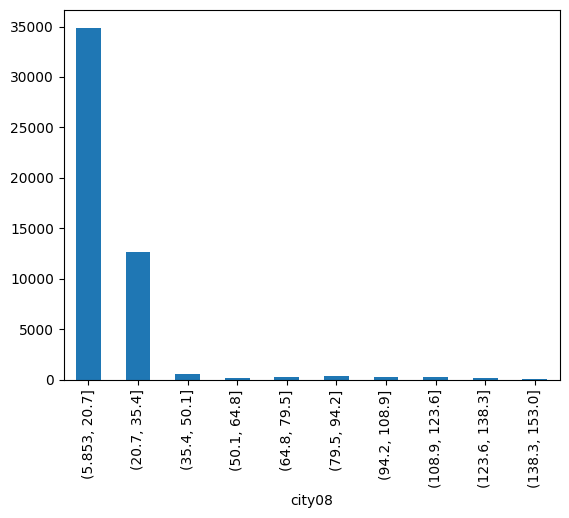

In [36]:
binpd.value_counts().sort_index().plot.bar()

<Axes: xlabel='city08'>

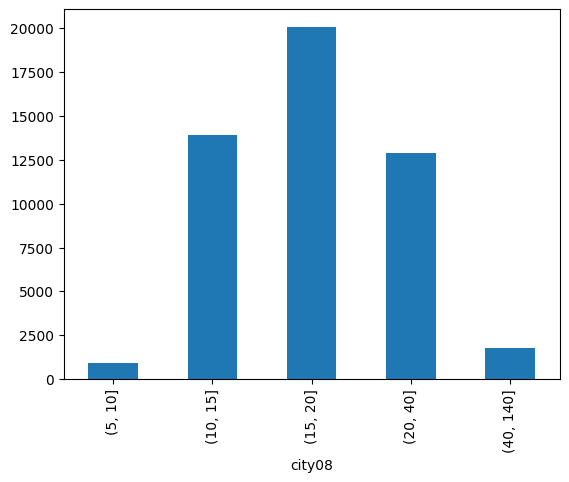

In [45]:
#Manual bins 
(pd.cut(autos.city08, bins=[5,10,15,20,40, 140])
 .value_counts()
 .sort_index()
 .plot.bar()
)

In [48]:
# binning with sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

# Define the binning strategy
binning_strategy = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

column_transformer = ColumnTransformer(
    transformers=[
        ('binning', binning_strategy, ['city08'])
    ],
    remainder='passthrough'  # This ensures other columns are left unchanged
)


pipeline = Pipeline(steps=[('transformer', column_transformer)])
pipeline.fit_transform(autos)


/opt/homebrew/Cellar/jupyterlab/4.5.1/libexec/lib/python3.14/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


,binning__city08,remainder__year,remainder__make,remainder__model,remainder__trany,remainder__drive,remainder__VClass,remainder__eng_dscr,remainder__barrels08,remainder__comb08,...,remainder__evMotor,remainder__cylinders,remainder__displ,remainder__fuelCost08,remainder__fuelType,remainder__highway08,remainder__trans_dscr,remainder__createdOn,remainder__offset,remainder__str_date
0,3.0,1985,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(FFS),14.167143,21,...,NaN,4.0,2.0,2100,Regular,25,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
1,0.0,1985,Ferrari,Testarossa,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(GUZZLER),27.046364,11,...,NaN,12.0,4.9,4000,Regular,14,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
2,4.0,1985,Dodge,Charger,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,(FFS),11.018889,27,...,NaN,4.0,2.2,1650,Regular,33,SIL,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
3,0.0,1985,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Rear-Wheel Drive,Vans,NaN,27.046364,11,...,NaN,8.0,5.2,4000,Regular,12,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
4,2.0,1993,Subaru,Legacy AWD Turbo,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,"(FFS,TRBO)",15.658421,19,...,NaN,4.0,2.2,3050,Premium,23,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49575,3.0,1993,Subaru,Legacy,Automatic 4-spd,Front-Wheel Drive,Compact Cars,(FFS),13.523182,22,...,NaN,4.0,2.2,2000,Regular,26,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49576,3.0,1993,Subaru,Legacy,Manual 5-spd,Front-Wheel Drive,Compact Cars,(FFS),12.935217,23,...,NaN,4.0,2.2,1900,Regular,28,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49577,2.0,1993,Subaru,Legacy AWD,Automatic 4-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,21,...,NaN,4.0,2.2,2100,Regular,24,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49578,2.0,1993,Subaru,Legacy AWD,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,21,...,NaN,4.0,2.2,2100,Regular,24,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
